In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read dataset and display columns

In [4]:
dataset=pd.read_csv("cruise_ship_info.csv")

In [5]:
dataset.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [6]:
print("The Number of Row:",dataset.shape[0])
print("The Number of Column",dataset.shape[1])

The Number of Row: 158
The Number of Column 9


In [7]:
def segreQuanQual(dataset):
    quantative=[]
    qualtative=[]

    for i in dataset.columns:
    #print(i)
        if(dataset[i].dtypes =='object'):
            qualtative.append(i)
        else:
            quantative.append(i)
    print("The Quantitative Data:",quantative)
    print("The Qualtitative Data",qualtative)
    return quantative,qualtative

In [8]:
quantative,qualtative=segreQuanQual(dataset)

The Quantitative Data: ['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density', 'crew']
The Qualtitative Data ['Ship_name', 'Cruise_line']


In [9]:
#Descriptive Porcess
def descriptive_Analysis(dataset,quantative):
    des_data=pd.DataFrame(index=["Count","Mean","Median","Mode","Std","Min","Q1:25%","Q2:50%","Q3:75%","Q4:100%","IQR","1.5Rule",
                            "Lesser","Greater"],columns=quantative)

    for i in quantative:
        des_data[i]["Count"]=len(dataset[i])
        des_data[i]["Mean"]=dataset[i].mean()
        des_data[i]["Median"]=dataset[i].median()
        des_data[i]["Mode"]=dataset[i].mode()[0]
        des_data[i]["Std"]=dataset[i].describe()["std"]
        des_data[i]["Min"]=dataset[i].describe()["min"]
        des_data[i]["Q1:25%"]=dataset[i].describe()["25%"]
        des_data[i]["Q2:50%"]=dataset[i].describe()["50%"]
        des_data[i]["Q3:75%"]=dataset[i].describe()["75%"]
        des_data[i]["Q4:100%"]=dataset[i].describe()["max"]
        des_data[i]["IQR"]=des_data[i]["Q3:75%"]-des_data[i]["Q1:25%"]
        des_data[i]["1.5Rule"]=1.5* des_data[i]["IQR"]
        des_data[i]["Lesser"]= des_data[i]["Q1:25%"]-des_data[i]["1.5Rule"]
        des_data[i]["Greater"]= des_data[i]["Q3:75%"]+des_data[i]["1.5Rule"]

    return des_data

In [10]:
des_Data=descriptive_Analysis(dataset,quantative)
des_Data

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Count,158,158,158,158,158,158,158
Mean,15.6899,71.2847,18.4574,8.13063,8.83,39.9009,7.79418
Median,14,71.899,19.5,8.555,9.57,39.085,8.15
Mode,12,70.367,20.52,9.51,9.75,34.29,9.2
Std,7.61569,37.2295,9.67709,1.79347,4.47142,8.63922,3.50349
Min,4,2.329,0.66,2.79,0.33,17.7,0.59
Q1:25%,10,46.013,12.535,7.1,6.1325,34.57,5.48
Q2:50%,14,71.899,19.5,8.555,9.57,39.085,8.15
Q3:75%,20,90.7725,24.845,9.51,10.885,44.185,9.99
Q4:100%,48,220,54,11.82,27,71.43,21


In [11]:
def outliercolumn(quantative,des_data):
    lesser=[]
    greater=[]

    for i in quantative:
        if(des_data[i]["Lesser"]>des_data[i]['Min']):
            lesser.append(i)
        if(des_data[i]['Greater']<des_data[i]['Q4:100%']):
            greater.append(i)
        
    print("Lesser Range",lesser)
    print("Greater Range",greater)
    return lesser,greater

In [12]:
lesser,greater=outliercolumn(quantative,des_Data)

Lesser Range ['length', 'passenger_density']
Greater Range ['Age', 'Tonnage', 'passengers', 'cabins', 'passenger_density', 'crew']


In [13]:
# if outlier present run this
def changeoutlier(dataset,des_Data):
    for i in lesser:
        dataset[i][dataset[i]<des_Data[i]['Lesser']]=des_Data[i]['Lesser']
    #print(dataset[i])
    for j in greater:
        dataset[j][dataset[j]>des_Data[j]['Greater']]=des_Data[j]['Greater']
    return des_Data

In [14]:
change_Data=changeoutlier(dataset,des_Data)
change_Data

C:\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Anaconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Count,158,158,158,158,158,158,158
Mean,15.6899,71.2847,18.4574,8.13063,8.83,39.9009,7.79418
Median,14,71.899,19.5,8.555,9.57,39.085,8.15
Mode,12,70.367,20.52,9.51,9.75,34.29,9.2
Std,7.61569,37.2295,9.67709,1.79347,4.47142,8.63922,3.50349
Min,4,2.329,0.66,2.79,0.33,17.7,0.59
Q1:25%,10,46.013,12.535,7.1,6.1325,34.57,5.48
Q2:50%,14,71.899,19.5,8.555,9.57,39.085,8.15
Q3:75%,20,90.7725,24.845,9.51,10.885,44.185,9.99
Q4:100%,48,220,54,11.82,27,71.43,21


In [15]:
des_Data=descriptive_Analysis(dataset,quantative)
des_Data

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
Count,158,158,158,158,158,158,158
Mean,15.5127,70.8774,18.3848,8.14269,8.77214,39.6185,7.75247
Median,14,71.899,19.5,8.555,9.57,39.085,8.15
Mode,12,70.367,20.52,9.51,9.75,34.29,9.2
Std,7.02293,35.9204,9.44879,1.7595,4.29023,7.75762,3.37203
Min,4,2.329,0.66,3.485,0.33,20.1475,0.59
Q1:25%,10,46.013,12.535,7.1,6.1325,34.57,5.48
Q2:50%,14,71.899,19.5,8.555,9.57,39.085,8.15
Q3:75%,20,90.7725,24.845,9.51,10.885,44.185,9.99
Q4:100%,35,157.912,43.31,11.82,18.0137,58.6075,16.755


In [16]:
lesser,greater=outliercolumn(quantative,des_Data)

Lesser Range []
Greater Range []


# 2. Calculate basic statistics of the data

In [17]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']

C:\Anaconda3\envs\ds\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


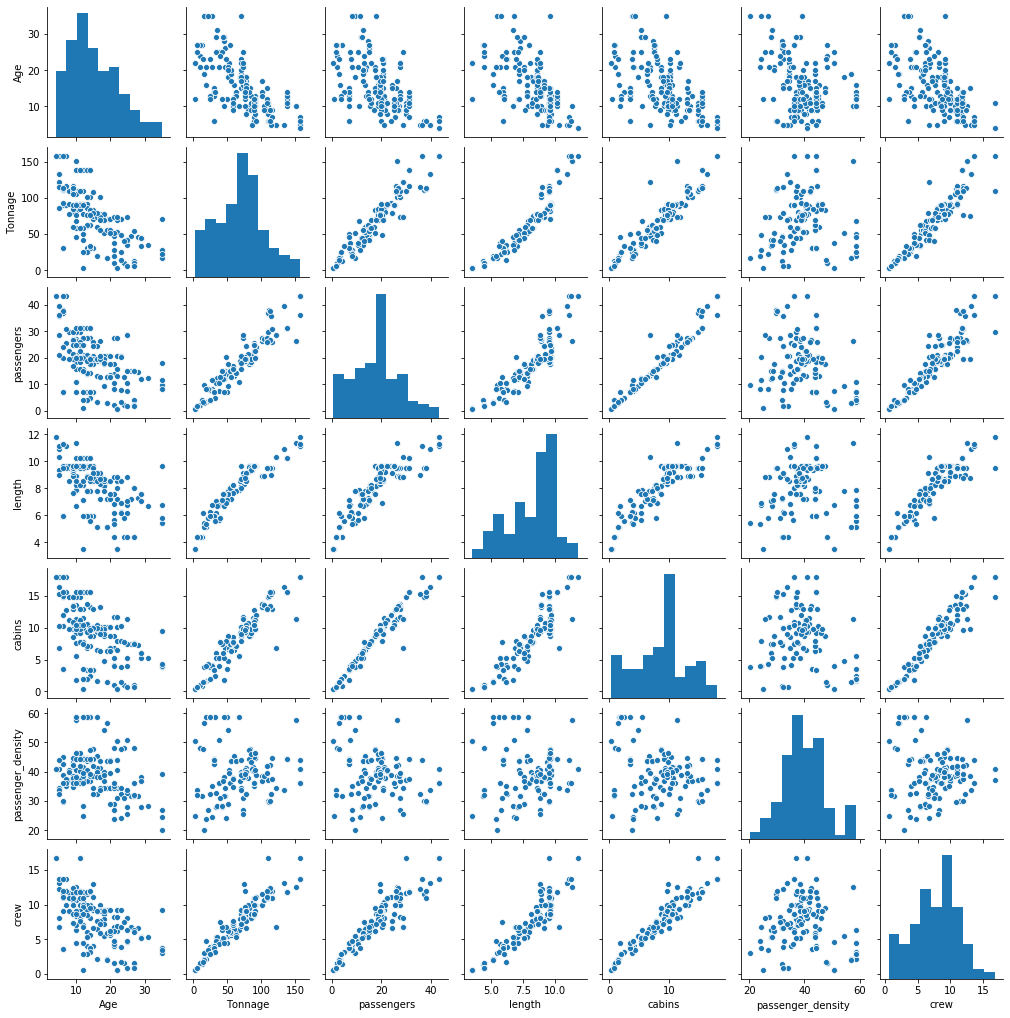

In [18]:
sns.pairplot(dataset[cols], size=2.0)

# 3. Variable selection for predicting "crew" size

# 3 (a) Calculation of covariance matrix

In [19]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(dataset[cols].iloc[:,range(0,7)].values)

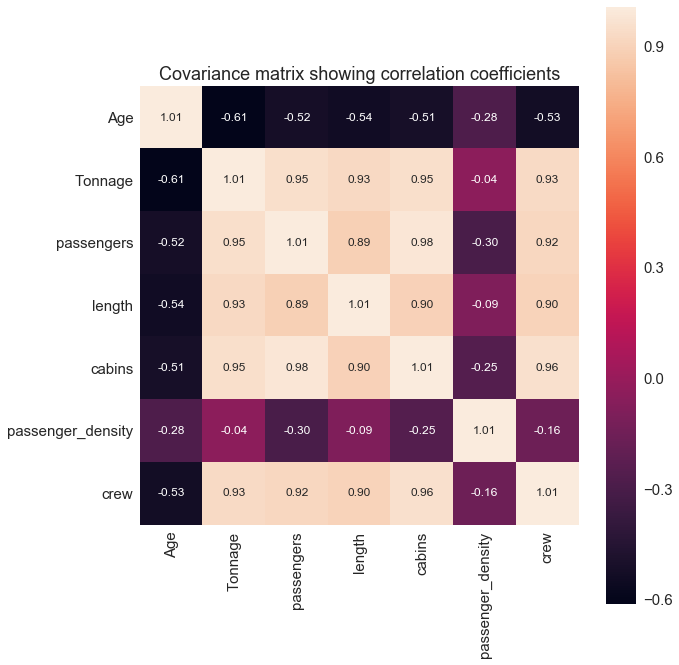

In [10]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

In [20]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']

In [21]:
dataset[cols_selected].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.550
1,30.277,6.94,5.94,3.55,3.550
2,47.262,14.86,7.22,7.43,6.700
3,110.000,29.74,9.53,14.88,16.755
4,101.353,26.42,8.92,13.21,10.000


In [22]:
X = df[cols_selected].iloc[:,0:4].values    # features matrix 
y = df[cols_selected]['crew'].values        # target variable

In [23]:
X.shape

(158, 4)

In [24]:
y.shape

(158,)

# 4. One-hot encoding for categorical features

In [30]:
df2=pd.get_dummies(dataset[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']],drop_first=True)  

In [31]:
df2.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Allegra,Ship_name_Amsterdam,Ship_name_Arcadia,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.550,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.550,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.700,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,16.755,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Data partitioning into training and testing sets

In [33]:
from sklearn.model_selection import train_test_split
X = dataset[cols_selected].iloc[:,0:4].values     
y = dataset[cols_selected]['crew']                 

In [41]:
X

array([[ 30.277  ,   6.94   ,   5.94   ,   3.55   ],
       [ 30.277  ,   6.94   ,   5.94   ,   3.55   ],
       [ 47.262  ,  14.86   ,   7.22   ,   7.43   ],
       [110.     ,  29.74   ,   9.53   ,  14.88   ],
       [101.353  ,  26.42   ,   8.92   ,  13.21   ],
       [ 70.367  ,  20.52   ,   8.55   ,  10.2    ],
       [ 70.367  ,  20.52   ,   8.55   ,  10.2    ],
       [ 70.367  ,  20.56   ,   8.55   ,  10.22   ],
       [ 70.367  ,  20.52   ,   8.55   ,  10.2    ],
       [110.239  ,  37.     ,   9.51   ,  14.87   ],
       [110.     ,  29.74   ,   9.51   ,  14.87   ],
       [ 46.052  ,  14.52   ,   7.27   ,   7.26   ],
       [ 70.367  ,  20.52   ,   8.55   ,  10.2    ],
       [ 70.367  ,  20.52   ,   8.55   ,  10.2    ],
       [ 86.     ,  21.24   ,   9.63   ,  10.62   ],
       [110.     ,  29.74   ,   9.51   ,  14.87   ],
       [ 88.5    ,  21.24   ,   9.63   ,  10.62   ],
       [ 70.367  ,  20.52   ,   8.55   ,  10.2    ],
       [ 88.5    ,  21.24   ,   9.63   ,  11.6

In [34]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

# 6. Building a muilt-regression model

Our machine learning regression model for predicting a ship's "crew" size can be expressed as:

$$ \hat{y}_{i} = w_0 + \sum_{j=1}^{4} X_{ij} w_j $$

In [40]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

regressor=slr.fit(X_train, y_train)
y_test_pred = regressor.predict(X_test)

# Evaluation of regression model

In [42]:
from sklearn.metrics import r2_score

print("The r2 for test set:",r2_score(y_test,y_test_pred))



The r2 for test set: 0.9088777678028097


# Regression coefficients

In [43]:
regressor.intercept_

-1.0012589297439556

In [44]:
regressor.coef_

array([ 0.01875221, -0.14002277,  0.43403626,  0.73092915])

 Regularized Regression: Lasso

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)



In [47]:
alpha = np.linspace(0.01,0.4,10)

In [49]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

#calculating mse

mse = np.mean((pred - y_test)**2)
print(mse)

from sklearn.metrics import r2_score
print("The r2 for test set:",r2_score(y_test,pred))



1.1935172189862837
The r2 for test set: 0.8910365860272587


In [52]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.05, normalize=True)

lassoReg.fit(X_train,y_train)

las_pred = lassoReg.predict(X_test)



mse = np.mean((las_pred - y_test)**2)

mse


from sklearn.metrics import r2_score
print("The r2 for test set:",r2_score(y_test,las_pred))





The r2 for test set: 0.875887197392546


In [54]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)

pred_cv = ENreg.predict(X_test)

#calculating mse

mse = np.mean((pred_cv - y_test)**2)


from sklearn.metrics import r2_score
print("The r2 for test set:",r2_score(y_test,pred_cv))



The r2 for test set: 0.8555463409887064
